In [2]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [1]:
link = 'https://www.imdb.com/title/tt4154796/reviews?sort=helpfulnessScore&dir=desc&ratingFilter=0'

In [3]:
page = requests.get(link)

In [4]:
page

<Response [200]>

In [5]:
page.content

b'\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt4154796?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Avengers: Endgame (2019) - Avengers: Endgame (2019) - User Reviews - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "Loa

In [6]:
soup = bs(page.content,'html.parser')

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///title/tt4154796?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Avengers: Endgame (2019) - Avengers: Endgame (2019) - User Reviews - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == '

In [17]:
title = soup.find_all('a',class_='title')

In [ ]:
title

In [ ]:
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

In [42]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title

25

In [ ]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]
review_title

In [39]:
ratings = [tag.previous_element for tag in 
                           soup.find_all('span', attrs={'class': 'point-scale'})]

In [ ]:
ratings

In [57]:
reviews = soup.find_all('div', class_= 'text show-more__control')

In [61]:
reviews[1]

<div class="text show-more__control">It was just amazing! Incredible, epic, emotional, action-packed and awesome! I wonder how it will all go on after this... Not since the wnd of Harry Potter or The Lord of the Rings have I been so excited for an ending saga. I can't wait for what is next. An all female Avengers? Hopefully!</div>

In [66]:
reviews[4]

<div class="text show-more__control">If you're going to watch this movie, avoid any spoilers, even spoiler free reviews.
Which is why I'm not going to say anything about the movie. Not even my opinion. All I'm going to say is:<br/><br/>The crowd applauded 3 times during the movie, and stood up to clap their hands after. This I have never witnessed in a Dutch cinema. Dutch crowds aren't usually passionate about this. I checked the row where I was sitting, and people were crying. After the movie, I was seeing people with smudged mascara. That's all I have to say about the movie.</div>

In [68]:
review_content = []
for i in range(0,len(reviews)):
    review_content.append(reviews[i].get_text())
review_content

['There is no way that I could describe my emotions for this movie. I\'m totally speechless. I haven\'t laughed (even cried) this much in Marvel movie or even in any movie. I\'m fully on my emotion, there are so many tears of joy and loss. Amazing story, the acting is outstanding, epic action, great CGI, the best storytelling ever told in a superhero movie, amazing performance. I love it more than 3000.Happiness, sadness, pure joy, excitement... I\'m gonna miss this moment in my whole life because let\'s face it- it\'s been awhile movies can bring such a big enthusiasm like this.It is such an experience you\'ll gonna remember it forever. People are clapping, laughing, crying, full of a state emotion. It\'s 3 hours long but it went by like a finger snapping by Thanos, and now I\'m thinking I\'m actually in Quantum Realm because it felt like 5 seconds. Even though you know where the story is gonna bring you because it\'s still a \'superhero movie\' but it left me speechless. It\'s not ju

In [70]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content

['There is no way that I could describe my emotions for this movie. I\'m totally speechless. I haven\'t laughed (even cried) this much in Marvel movie or even in any movie. I\'m fully on my emotion, there are so many tears of joy and loss. Amazing story, the acting is outstanding, epic action, great CGI, the best storytelling ever told in a superhero movie, amazing performance. I love it more than 3000.Happiness, sadness, pure joy, excitement... I\'m gonna miss this moment in my whole life because let\'s face it- it\'s been awhile movies can bring such a big enthusiasm like this.It is such an experience you\'ll gonna remember it forever. People are clapping, laughing, crying, full of a state emotion. It\'s 3 hours long but it went by like a finger snapping by Thanos, and now I\'m thinking I\'m actually in Quantum Realm because it felt like 5 seconds. Even though you know where the story is gonna bring you because it\'s still a \'superhero movie\' but it left me speechless. It\'s not ju

In [71]:
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
review_content

['There is no way that I could describe my emotions for this movie. I\'m totally speechless. I haven\'t laughed (even cried) this much in Marvel movie or even in any movie. I\'m fully on my emotion, there are so many tears of joy and loss. Amazing story, the acting is outstanding, epic action, great CGI, the best storytelling ever told in a superhero movie, amazing performance. I love it more than 3000.Happiness, sadness, pure joy, excitement... I\'m gonna miss this moment in my whole life because let\'s face it- it\'s been awhile movies can bring such a big enthusiasm like this.It is such an experience you\'ll gonna remember it forever. People are clapping, laughing, crying, full of a state emotion. It\'s 3 hours long but it went by like a finger snapping by Thanos, and now I\'m thinking I\'m actually in Quantum Realm because it felt like 5 seconds. Even though you know where the story is gonna bring you because it\'s still a \'superhero movie\' but it left me speechless. It\'s not ju

In [72]:
len(review_content)

25

In [74]:
review_title
ratings
review_content

['There is no way that I could describe my emotions for this movie. I\'m totally speechless. I haven\'t laughed (even cried) this much in Marvel movie or even in any movie. I\'m fully on my emotion, there are so many tears of joy and loss. Amazing story, the acting is outstanding, epic action, great CGI, the best storytelling ever told in a superhero movie, amazing performance. I love it more than 3000.Happiness, sadness, pure joy, excitement... I\'m gonna miss this moment in my whole life because let\'s face it- it\'s been awhile movies can bring such a big enthusiasm like this.It is such an experience you\'ll gonna remember it forever. People are clapping, laughing, crying, full of a state emotion. It\'s 3 hours long but it went by like a finger snapping by Thanos, and now I\'m thinking I\'m actually in Quantum Realm because it felt like 5 seconds. Even though you know where the story is gonna bring you because it\'s still a \'superhero movie\' but it left me speechless. It\'s not ju

In [75]:
df = pd.DataFrame()

In [78]:
df["Review_Content"]=review_content

In [80]:
df["Ratings"]=ratings


In [82]:
df["Rev_Title"]=review_title

In [83]:
df

,Review_Content,Ratings,Rev_Title
0,There is no way that I could describe my emoti...,10,An experience you'll gonna remember forever.
1,"It was just amazing! Incredible, epic, emotion...",10,AMAZING
2,"I have to say, my first reaction walking out o...",6,"Amazing, but the more I dwell on it the worse..."
3,"After Avengers Infinity War, we waited for the...",10,The End of an Era!
4,"If you're going to watch this movie, avoid any...",10,The ending made all 22 movies worth it
5,Unpopular opinion.\nLet me start by saying tha...,6,Overhyped. Infinity War was WAY Better
6,I've just come from watching Endgame and I mus...,4,"The writers got carried away, the directors o..."
7,"Avengers Endgame is, above all, a great homage...",10,Great Final battle with all the avengers
8,"Plot holes,time travel plot has always been ba...",7,"Just ok,but youre a sheep if you believe its ..."
9,"First of, Infinity War was the greatest MCU mo...",6,Dug themselves a hole they couldn't get out o...


In [84]:
df.to_csv(r'E:\reviews-IMDB-Avengers_End Game.csv',index=True)

In [ ]:
#Lets run sentiment analysis on the same dataset

In [89]:
################## Sentiment Analysis #####################3
from textblob import TextBlob
df['polarity'] = df['Review_Content'].apply(lambda x: TextBlob(x).sentiment[0])
df[['Review_Content','polarity']].head(5)

# Displaying top 5 positive posts of Category_A
df[df.polarity>0].head(20)


,Review_Content,Ratings,Rev_Title,polarity
0,There is no way that I could describe my emoti...,10,An experience you'll gonna remember forever.,0.253090
1,"It was just amazing! Incredible, epic, emotion...",10,AMAZING,0.390625
2,"I have to say, my first reaction walking out o...",6,"Amazing, but the more I dwell on it the worse...",0.161026
3,"After Avengers Infinity War, we waited for the...",10,The End of an Era!,0.176929
4,"If you're going to watch this movie, avoid any...",10,The ending made all 22 movies worth it,0.050000
5,Unpopular opinion.\nLet me start by saying tha...,6,Overhyped. Infinity War was WAY Better,0.106532
6,I've just come from watching Endgame and I mus...,4,"The writers got carried away, the directors o...",0.099807
7,"Avengers Endgame is, above all, a great homage...",10,Great Final battle with all the avengers,0.167137
8,"Plot holes,time travel plot has always been ba...",7,"Just ok,but youre a sheep if you believe its ...",0.101042
9,"First of, Infinity War was the greatest MCU mo...",6,Dug themselves a hole they couldn't get out o...,0.166667


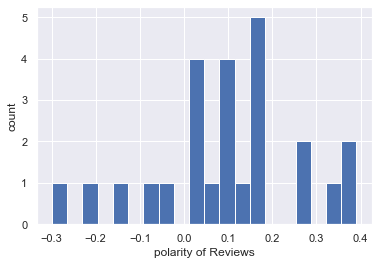

In [92]:
# ======= The distribution of Categories polarity score =======
import seaborn as sns   
import matplotlib.pyplot as plt
sns.set()
plt.hist(x='polarity', data=df, bins=20);
plt.xlabel('polarity of Reviews');
plt.ylabel('count'); 
plt.figsize=(10, 16)